**CAPSTONE PROJECT - THE BATTLE OF NEIGHBOURHOODS (WEEK 2)**

Introduction
There are many restaurants across the city of London. To name a few: Roganic , CORE by Clare Smyth, The Five Fields and Portland Restaurant. Most of these restaurants offer continental, European or American dishes.

However many of the restaurants do not offer African dishes. Approximately 922,684 Africans live in London. There are decent number of Africans namely Nigerians, South Africans, Kenyans to name a few that reside in the greater London Area. 
My project seeks to find the most populous areas in London that would offer prospective investors open restaurants to cater mostly for Africans who will want to have a taste of African dishes.
The project will explore the various neighborhoods in London and segment them and recommend which area is suitable for such business.



In [1]:
#import necessary libraries
from ftplib import FTP
import requests
import numpy as np
import pandas as pd
import lxml.html as lh
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.cm as cm
import matplotlib.colors as colors
#import folium

from sklearn.cluster import KMeans
import json

In [2]:
#Reading data from saved into an FTP site, i am removing the credentials for security
import ftplib
data_url ='ftp://Neighbourhoods_London.xlsx'
file = pd.ExcelFile(data_url)
file.sheet_names
df2 = file.parse (0)
df2.head (21)


,Location,London Borough,Post Town,Post Code District,Dial Code,OS Grid
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,20,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",20,TQ205805
2,Addington,Croydon,CROYDON,CR0,20,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,20,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",20,TQ478728
5,Aldborough Hatch,Redbridge,ILFORD,IG2,20,TQ455895
6,Aldgate,City,LONDON,EC3,20,TQ334813
7,Aldwych,Westminster,LONDON,WC2,20,TQ307810
8,Alperton,Brent,WEMBLEY,HA0,20,TQ185835
9,Anerley,Bromley,LONDON,SE20,20,TQ345695


In [3]:
#rename columns
df2.rename(columns={"London Borough": "Borough"}, inplace=True)
df2.head ()

,Location,Borough,Post Town,Post Code District,Dial Code,OS Grid
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,20,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",20,TQ205805
2,Addington,Croydon,CROYDON,CR0,20,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,20,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",20,TQ478728


In [5]:
# getting coordinates of Boroughs in London, data stored on an ftp server. imported and read into a dataframe, i am removing the credentials for security
data_url ='ftp:///geospatial_London.xlsx'
file = pd.ExcelFile(data_url)
file.sheet_names
df_coordinates = file.parse (0)
df_coordinates.head ()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,0.2817
4,Bromley,51.4039,0.0198


In [6]:
#Dropping the dial code / OS Grid columns as I wont be using them
df2 = df2.drop("Dial Code", axis=1)
df2 = df2.drop("OS Grid", axis=1)
#df2 = df2.drop("Location", axis=1)

In [7]:
df2.head ()

,Location,Borough,Post Town,Post Code District
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4"
2,Addington,Croydon,CROYDON,CR0
3,Addiscombe,Croydon,CROYDON,CR0
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14"


In [8]:
#check the size of the data frame
df2.shape

(533, 4)

In [9]:
#removing duplicate boroughs
df2.drop_duplicates(subset ="Post Town", 
                     keep = False, inplace = True) 
#df1.head ()

In [10]:
#Getting the black population of London,i am removing the credentials for security
data_url ='ftp://black population.xlsx'
file = pd.ExcelFile(data_url)
file.sheet_names
df_black = file.parse (0)
df_black.head (21)

,London Borough,Black African Population,Black Caribbean Population,Other Black Population,Total Black Population,Post Code
0,Lambeth,35187,28886,14469,78542,"SW2, SW9, SE5"
1,Southwark,47413,17974,12124,77511,SE1
2,Lewisham,32025,30854,12063,74942,SE6
3,Croydon,28981,31320,12955,73256,CR0
4,Newham,37811,15050,7395,60256,"E6, E16, IG11"
5,Brent,24391,23723,10518,58632,HA0
6,Hackney,27976,19168,9714,56858,E8
7,Enfield,28222,17334,8131,53687,"N11, N14"
8,Greenwich,35164,8051,5440,48655,"SE3, SE12"
9,Haringey,23037,18087,6706,47830,"N11, N22"


In [11]:
#rename column so to easily join the 2 dataframes
df_black.rename(columns={"London Borough": "Borough"}, inplace=True)
df_black.head ()

,Borough,Black African Population,Black Caribbean Population,Other Black Population,Total Black Population,Post Code
0,Lambeth,35187,28886,14469,78542,"SW2, SW9, SE5"
1,Southwark,47413,17974,12124,77511,SE1
2,Lewisham,32025,30854,12063,74942,SE6
3,Croydon,28981,31320,12955,73256,CR0
4,Newham,37811,15050,7395,60256,"E6, E16, IG11"


In [12]:
#merging the two data frames
df_all = pd.merge(df_coordinates, df_black, how='outer', on = 'Borough')

In [13]:
df_all.head (28)

,Borough,Latitude,Longitude,Black African Population,Black Caribbean Population,Other Black Population,Total Black Population,Post Code
0,Barking and Dagenham,51.5607,0.1557,28685.0,5227.0,3228.0,37140.0,IG11
1,Barnet,51.6252,0.1517,19392.0,4468.0,3571.0,27431.0,"EN5, NW7"
2,Bexley,51.4549,0.1505,NaN,NaN,NaN,NaN,NaN
3,Brent,51.5588,0.2817,24391.0,23723.0,10518.0,58632.0,HA0
4,Bromley,51.4039,0.0198,NaN,NaN,NaN,NaN,NaN
5,Camden,51.5290,0.1255,NaN,NaN,NaN,NaN,NaN
6,Croydon,51.3714,0.0977,28981.0,31320.0,12955.0,73256.0,CR0
7,Ealing,51.5130,0.3089,17299.0,13192.0,6369.0,36860.0,W4
8,Enfield,51.6538,0.0799,28222.0,17334.0,8131.0,53687.0,"N11, N14"
9,Greenwich,51.4892,0.0648,35164.0,8051.0,5440.0,48655.0,"SE3, SE12"


In [14]:
#check the number of boroughs
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_black['Borough'].unique()),
        df_black.shape[0]
    )
)

The dataframe has 20 boroughs and 20 neighborhoods.


In [ ]:
# scraping online to get the coordinates of boroughs in London
url='https://en.wikipedia.org/wiki/List_of_London_boroughs'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

tr_elements = doc.xpath('//tr')

#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()

    col.append((name,[]))
    
   

In [ ]:
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 3, the //tr data is not from our table 
    if len(T)!=10:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [ ]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [ ]:
df.head ()

In [ ]:
#perfoming data wrangling on the data set
#remove /n from dataframe
df = df.replace('\n','', regex=True)
df.head ()

In [ ]:
# drop unnecessary columns
df = df.drop(["Local authority\n","Political control\n","Headquarters\n","Inner\n","Status\n","Area (sq mi)\n","Population (2013 est)[1]\n"," Nr. in map \n"], axis=1)

In [ ]:
df.head (40)

In [ ]:
# drop row with borough / coordinates
df.drop ( (32), axis =0, inplace = True)

In [ ]:
#replace boroughs with numbers, to their correct names
df.replace(to_replace ="Greenwich [note 2]", 
                 value ="Greenwich",inplace = True) 

In [ ]:
df.head (10)

In [24]:
#importing the folium library for visualization
!conda install -c conda-forge folium=0.5.0
import folium


Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  53.24 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  36.13 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  40.78 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  48.78 MB/s


In [15]:
df_all.head ()


,Borough,Latitude,Longitude,Black African Population,Black Caribbean Population,Other Black Population,Total Black Population,Post Code
0,Barking and Dagenham,51.5607,0.1557,28685.0,5227.0,3228.0,37140.0,IG11
1,Barnet,51.6252,0.1517,19392.0,4468.0,3571.0,27431.0,"EN5, NW7"
2,Bexley,51.4549,0.1505,NaN,NaN,NaN,NaN,NaN
3,Brent,51.5588,0.2817,24391.0,23723.0,10518.0,58632.0,HA0
4,Bromley,51.4039,0.0198,NaN,NaN,NaN,NaN,NaN


In [16]:
#getting the coordinates of London
from geopy.geocoders import Nominatim
address = 'London, UK'
geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [17]:
df_all.head (34)
#df_all.shape

,Borough,Latitude,Longitude,Black African Population,Black Caribbean Population,Other Black Population,Total Black Population,Post Code
0,Barking and Dagenham,51.5607,0.1557,28685.0,5227.0,3228.0,37140.0,IG11
1,Barnet,51.6252,0.1517,19392.0,4468.0,3571.0,27431.0,"EN5, NW7"
2,Bexley,51.4549,0.1505,NaN,NaN,NaN,NaN,NaN
3,Brent,51.5588,0.2817,24391.0,23723.0,10518.0,58632.0,HA0
4,Bromley,51.4039,0.0198,NaN,NaN,NaN,NaN,NaN
5,Camden,51.5290,0.1255,NaN,NaN,NaN,NaN,NaN
6,Croydon,51.3714,0.0977,28981.0,31320.0,12955.0,73256.0,CR0
7,Ealing,51.5130,0.3089,17299.0,13192.0,6369.0,36860.0,W4
8,Enfield,51.6538,0.0799,28222.0,17334.0,8131.0,53687.0,"N11, N14"
9,Greenwich,51.4892,0.0648,35164.0,8051.0,5440.0,48655.0,"SE3, SE12"


In [31]:
#merging the data set
#df_combined = pd.merge(df_all, df2, how='inner', on = 'Borough')
#df_combined.head (44)
#df_all.head ()
#df_combined = df2[df2['Post Town'].str.contains('London', regex=False)]
df_combined.rename(columns={"Post Town": "Neighbourhood"}, inplace=True)
#df_combined.head (509)
#df2.head()
# drop unnecessary columns

df_combined.head (25)



,Borough,Latitude,Longitude,Post Code,Location,Neighbourhood,Post Code District
0,Barnet,51.6252,0.1517,"EN5, NW7",Arkley,"BARNET, LONDON","EN5, NW7"
1,Barnet,51.6252,0.1517,"EN5, NW7",Barnet Gate,"LONDON, BARNET","NW7, EN5"
2,Bexley,51.4549,0.1505,NaN,Albany Park,"BEXLEY, SIDCUP","DA5, DA14"
3,Bexley,51.4549,0.1505,NaN,Bexleyheath (also Bexley New Town),"BEXLEYHEATH, LONDON","DA6, DA7, SE2"
4,Bexley,51.4549,0.1505,NaN,Longlands,"LONDON, SIDCUP","SE9, DA14, DA15"
5,Bromley,51.4039,0.0198,NaN,Beckenham,"BECKENHAM, LONDON","BR3, SE20"
6,Bromley,51.4039,0.0198,NaN,Cudham,SEVENOAKS,TN14
7,Croydon,51.3714,0.0977,CR0,Kenley,KENLEY,CR8
8,Croydon,51.3714,0.0977,CR0,Thornton Heath,THORNTON HEATH,CR7
9,Ealing,51.5130,0.3089,W4,Northolt,NORTHOLT,UB5


In [20]:
# drop unnecessary columns
df_combined = df_combined.drop(["Black African Population","Black Caribbean Population","Other Black Population","Total Black Population"], axis=1)

In [21]:
#check the number of boroughs
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_combined['Borough'].unique()),
        df_combined.shape[0]
    )
)

The dataframe has 13 boroughs and 23 neighborhoods.


In [27]:
df_combined.head ()

,Borough,Latitude,Longitude,Post Code,Location,Post Town,Post Code District
0,Barnet,51.6252,0.1517,"EN5, NW7",Arkley,"BARNET, LONDON","EN5, NW7"
1,Barnet,51.6252,0.1517,"EN5, NW7",Barnet Gate,"LONDON, BARNET","NW7, EN5"
2,Bexley,51.4549,0.1505,NaN,Albany Park,"BEXLEY, SIDCUP","DA5, DA14"
3,Bexley,51.4549,0.1505,NaN,Bexleyheath (also Bexley New Town),"BEXLEYHEATH, LONDON","DA6, DA7, SE2"
4,Bexley,51.4549,0.1505,NaN,Longlands,"LONDON, SIDCUP","SE9, DA14, DA15"


In [ ]:
#Generate map for black area population in London
map_london = folium.Map(location=[latitude, longitude], zoom_start=5)
for latitude, longitude, borough, Neighbourhood in zip(df_combined['Latitude'], df_combined['Longitude'], df_combined['Borough'],df_combined['Neighbourhood']):
    label = '{}, {}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [ ]:
##authenticating on four for four square
CLIENT_ID = 'myid' 
CLIENT_SECRET = 'my login' 
VERSION = '20180605' 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [33]:
# getting the first neighbourhood in the data frame using the index 
df_combined.loc[22, 'Neighbourhood']

'WALLINGTON'

In [35]:
#checking the longitude and latitude of the beaches with index 22
neighborhood_latitude = df_combined.loc[22, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_combined.loc[22, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_combined.loc[22, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of WALLINGTON are 51.3618, 0.1945.


In [36]:
LIMIT = 20 
# limit of number of venues returned by Foursquare API
radius = 500 
# define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RFZ4T1WZ1J5FGETOZM1GWMGFU0C0HFG1ZKT2XMCEZOOJ4EB3&client_secret=1SNGEGLVAS1UDRDX1RJRXS2NUCNUXPJ4OEAISJDSMNXUP0U5&v=20180605&ll=51.3618,0.1945&radius=500&limit=20'

In [37]:
#Getting the results on a  json file
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cbc7b8bf594df78c0e5c972'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4cdd6f9d901e9eb0cdbec2ef-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/historicsite_',
          'suffix': '.png'},
         'id': '4deefb944765f83613cdba6e',
         'name': 'Historic Site',
         'pluralName': 'Historic Sites',
         'primary': True,
         'shortName': 'Historic Site'}],
       'id': '4cdd6f9d901e9eb0cdbec2ef',
       'location': {'address': 'Lullingstone Ln',
        'cc': 'GB',
        'city': 'Eynsford',
        'country': 'United Kingdom',
        'distance': 305,
        'formattedAddress': ['Lullingstone Ln',
         'Eynsford',
         'Kent',
         'DA4 0JA',
         'United Kingdom'],
        'la

In [38]:
#function to get the categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [39]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lullingstone Roman Villa,Historic Site,51.364113,0.196861
1,Lullingstone Castle and The World Garden,Historic Site,51.359975,0.197742


In [40]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
#get all the venues in london nearby
london_Venues = getNearbyVenues(names=df_combined['Neighbourhood'],
                                   latitudes=df_combined['Latitude'],
                                   longitudes=df_combined['Longitude']
                                  )

BARNET, LONDON
LONDON, BARNET
BEXLEY, SIDCUP
BEXLEYHEATH, LONDON
LONDON, SIDCUP
BECKENHAM, LONDON
SEVENOAKS
KENLEY
THORNTON HEATH
NORTHOLT
HARROW, STANMORE
STANMORE
NORTHWOOD
BRENTFORD
MITCHAM
LONDON, BARKING
CHIGWELL
TEDDINGTON, HAMPTON
TEDDINGTON
WALLINGTON, CROYDON
CARSHALTON
SUTTON/MERTON
WALLINGTON


In [43]:
print(london_Venues.shape)
london_Venues.head(176)

(176, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"BEXLEY, SIDCUP",51.4549,0.1505,Zizzi,51.455834,0.150347,Italian Restaurant
1,"BEXLEY, SIDCUP",51.4549,0.1505,Wilko,51.456257,0.148608,Furniture / Home Store
2,"BEXLEY, SIDCUP",51.4549,0.1505,TK Maxx,51.456481,0.147830,Clothing Store
3,"BEXLEY, SIDCUP",51.4549,0.1505,Prince Albert,51.455171,0.152965,Pub
4,"BEXLEY, SIDCUP",51.4549,0.1505,Bella Italia,51.456330,0.149537,Italian Restaurant
5,"BEXLEY, SIDCUP",51.4549,0.1505,Lidl,51.455574,0.151890,Supermarket
6,"BEXLEY, SIDCUP",51.4549,0.1505,Sainsbury's,51.455980,0.149078,Supermarket
7,"BEXLEY, SIDCUP",51.4549,0.1505,Boots,51.455610,0.145472,Pharmacy
8,"BEXLEY, SIDCUP",51.4549,0.1505,Bexleyheath Clock Tower,51.456502,0.147301,Plaza
9,"BEXLEY, SIDCUP",51.4549,0.1505,Greggs,51.456253,0.145569,Bakery


In [44]:
#group each neighbourhood
london_Venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"BECKENHAM, LONDON",20,20,20,20,20,20
"BEXLEY, SIDCUP",20,20,20,20,20,20
"BEXLEYHEATH, LONDON",20,20,20,20,20,20
BRENTFORD,1,1,1,1,1,1
CARSHALTON,2,2,2,2,2,2
CHIGWELL,20,20,20,20,20,20
KENLEY,8,8,8,8,8,8
"LONDON, BARKING",16,16,16,16,16,16
"LONDON, SIDCUP",20,20,20,20,20,20


**WE CAN SEE FROM THE DATA SET THERE ARE NO AFRICAN RESTAURANTS**

In [45]:
#check for the unique categories
print('There are {} uniques categories.'.format(len(london_Venues['Venue Category'].unique())))
london_Venues.head ()

There are 48 uniques categories.


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"BEXLEY, SIDCUP",51.4549,0.1505,Zizzi,51.455834,0.150347,Italian Restaurant
1,"BEXLEY, SIDCUP",51.4549,0.1505,Wilko,51.456257,0.148608,Furniture / Home Store
2,"BEXLEY, SIDCUP",51.4549,0.1505,TK Maxx,51.456481,0.147830,Clothing Store
3,"BEXLEY, SIDCUP",51.4549,0.1505,Prince Albert,51.455171,0.152965,Pub
4,"BEXLEY, SIDCUP",51.4549,0.1505,Bella Italia,51.456330,0.149537,Italian Restaurant


In [46]:
# applying one hot encoding
london_onehot = pd.get_dummies(london_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighbourhood'] = london_Venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Neighbourhood,Airport,Airport Lounge,Airport Service,American Restaurant,Asian Restaurant,Bakery,Bar,Bookstore,Burger Joint,Business Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Cosmetics Shop,Department Store,Donut Shop,Duty-free Shop,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym / Fitness Center,Historic Site,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Light Rail Station,Movie Theater,Multiplex,Pharmacy,Pizza Place,Plaza,Portuguese Restaurant,Pub,Rafting,Sandwich Place,Soccer Stadium,Sporting Goods Shop,Stables,Supermarket,Theater,Train Station,Video Game Store,Warehouse Store
0,"BEXLEY, SIDCUP",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"BEXLEY, SIDCUP",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"BEXLEY, SIDCUP",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"BEXLEY, SIDCUP",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,"BEXLEY, SIDCUP",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
london_onehot.shape

(176, 49)

In [48]:
#get the mean frequency of each neighbour
london_groups = london_onehot.groupby('Neighbourhood').mean().reset_index()
london_groups

,Neighbourhood,Airport,Airport Lounge,Airport Service,American Restaurant,Asian Restaurant,Bakery,Bar,Bookstore,Burger Joint,Business Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Cosmetics Shop,Department Store,Donut Shop,Duty-free Shop,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym / Fitness Center,Historic Site,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Light Rail Station,Movie Theater,Multiplex,Pharmacy,Pizza Place,Plaza,Portuguese Restaurant,Pub,Rafting,Sandwich Place,Soccer Stadium,Sporting Goods Shop,Stables,Supermarket,Theater,Train Station,Video Game Store,Warehouse Store
0,"BECKENHAM, LONDON",0.0000,0.0000,0.0000,0.0,0.05,0.000,0.05,0.05,0.05,0.0,0.0000,0.05,0.10,0.1000,0.05,0.05,0.05,0.0000,0.05,0.000,0.05,0.00,0.05,0.0,0.0,0.0000,0.05,0.00,0.00,0.000,0.000,0.00,0.00,0.0000,0.100,0.00,0.05,0.000,0.0000,0.0500,0.0,0.0,0.0,0.000,0.00,0.0,0.00,0.00
1,"BEXLEY, SIDCUP",0.0000,0.0000,0.0000,0.0,0.00,0.050,0.00,0.00,0.00,0.0,0.0000,0.00,0.05,0.1000,0.00,0.00,0.00,0.0000,0.00,0.050,0.05,0.05,0.00,0.0,0.0,0.0500,0.00,0.00,0.00,0.100,0.000,0.00,0.05,0.0500,0.000,0.05,0.05,0.100,0.0000,0.0500,0.0,0.0,0.0,0.100,0.00,0.0,0.05,0.00
2,"BEXLEYHEATH, LONDON",0.0000,0.0000,0.0000,0.0,0.00,0.050,0.00,0.00,0.00,0.0,0.0000,0.00,0.05,0.1000,0.00,0.00,0.00,0.0000,0.00,0.050,0.05,0.05,0.00,0.0,0.0,0.0500,0.00,0.00,0.00,0.100,0.000,0.00,0.05,0.0500,0.000,0.05,0.05,0.100,0.0000,0.0500,0.0,0.0,0.0,0.100,0.00,0.0,0.05,0.00
3,BRENTFORD,0.0000,0.0000,0.0000,0.0,0.00,0.000,0.00,0.00,0.00,0.0,0.0000,0.00,0.00,0.0000,0.00,0.00,0.00,0.0000,0.00,1.000,0.00,0.00,0.00,0.0,0.0,0.0000,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,0.00,0.000,0.0000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.00,0.00
4,CARSHALTON,0.0000,0.0000,0.0000,0.0,0.00,0.000,0.00,0.00,0.00,0.0,0.0000,0.00,0.00,0.0000,0.00,0.00,0.00,0.0000,0.00,0.000,0.00,0.00,0.00,1.0,0.0,0.0000,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,0.00,0.000,0.0000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.00,0.00
5,CHIGWELL,0.0000,0.0000,0.0000,0.0,0.00,0.050,0.00,0.05,0.00,0.0,0.0000,0.00,0.20,0.1000,0.00,0.05,0.00,0.0000,0.00,0.050,0.00,0.00,0.05,0.0,0.0,0.0000,0.00,0.05,0.05,0.000,0.000,0.05,0.00,0.0500,0.000,0.00,0.05,0.000,0.0000,0.0500,0.0,0.0,0.0,0.050,0.05,0.0,0.00,0.05
6,KENLEY,0.0000,0.0000,0.0000,0.0,0.00,0.125,0.00,0.00,0.00,0.0,0.1250,0.00,0.00,0.1250,0.00,0.00,0.00,0.0000,0.00,0.125,0.00,0.00,0.00,0.0,0.0,0.0000,0.00,0.00,0.00,0.125,0.000,0.00,0.00,0.0000,0.125,0.00,0.00,0.125,0.0000,0.0000,0.0,0.0,0.0,0.125,0.00,0.0,0.00,0.00
7,"LONDON, BARKING",0.0625,0.0625,0.0625,0.0,0.00,0.000,0.00,0.00,0.00,0.0,0.0625,0.00,0.00,0.0625,0.00,0.00,0.00,0.0625,0.00,0.000,0.00,0.00,0.00,0.0,0.0,0.3125,0.00,0.00,0.00,0.000,0.125,0.00,0.00,0.0625,0.000,0.00,0.00,0.000,0.0625,0.0625,0.0,0.0,0.0,0.000,0.00,0.0,0.00,0.00
8,"LONDON, SIDCUP",0.0000,0.0000,0.0000,0.0,0.00,0.050,0.00,0.00,0.00,0.0,0.0000,0.00,0.05,0.1000,0.00,0.00,0.00,0.0000,0.00,0.050,0.05,0.05,0.00,0.0,0.0,0.0500,0.00,0.00,0.00,0.100,0.000,0.00,0.05,0.0500,0.000,0.05,0.05,0.100,0.0000,0.0500,0.0,0.0,0.0,0.100,0.00,0.0,0.05,0.00
9,MITCHAM,0.0000,0.0000,0.0000,0.0,0.00,0.000,0.00,0.00,0.00,0.0,0.0000,0.00,0.00,0.0000,0.00,0.00,0.00,0.0000,0.00,0.000,0.00,0.00,0.00,0.0,0.0,0.0000,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,0.00,1.000,0.0000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.00,0.00


In [49]:
#print neighbours with the top 5 venues
top_venues = 5

for hood in london_groups['Neighbourhood']:
    print("----"+hood+"----")
    temp = london_groups[london_groups['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----BECKENHAM, LONDON----
              venue  freq
0       Pizza Place  0.10
1       Coffee Shop  0.10
2    Clothing Store  0.10
3  Department Store  0.05
4    Sandwich Place  0.05


----BEXLEY, SIDCUP----
                   venue  freq
0            Coffee Shop  0.10
1            Supermarket  0.10
2                    Pub  0.10
3     Italian Restaurant  0.10
4  Portuguese Restaurant  0.05


----BEXLEYHEATH, LONDON----
                   venue  freq
0            Coffee Shop  0.10
1            Supermarket  0.10
2                    Pub  0.10
3     Italian Restaurant  0.10
4  Portuguese Restaurant  0.05


----BRENTFORD----
                  venue  freq
0  Fast Food Restaurant   1.0
1               Airport   0.0
2                 Hotel   0.0
3     Indian Restaurant   0.0
4             Irish Pub   0.0


----CARSHALTON----
               venue  freq
0      Historic Site   1.0
1              Hotel   0.0
2     Ice Cream Shop   0.0
3  Indian Restaurant   0.0
4          Irish Pub   0.0


----CH

In [51]:
def return_most_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [52]:
#create a dataframe and display the top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = london_groups['Neighbourhood']

for ind in np.arange(london_groups.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_groups.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BECKENHAM, LONDON",Pizza Place,Coffee Shop,Clothing Store,Portuguese Restaurant,Electronics Store,Ice Cream Shop,Donut Shop,Department Store,Cosmetics Shop,Chocolate Shop
1,"BEXLEY, SIDCUP",Italian Restaurant,Pub,Supermarket,Coffee Shop,Clothing Store,Hotel,Pharmacy,Plaza,Portuguese Restaurant,Multiplex
2,"BEXLEYHEATH, LONDON",Italian Restaurant,Pub,Supermarket,Coffee Shop,Clothing Store,Hotel,Pharmacy,Plaza,Portuguese Restaurant,Multiplex
3,BRENTFORD,Fast Food Restaurant,Warehouse Store,Video Game Store,Grocery Store,Furniture / Home Store,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop
4,CARSHALTON,Historic Site,Video Game Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop


In [53]:
#run kmeans clustering to put them into neighbours
kclusters = 5

london_grouped_clustering = london_groups.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 3, 1, 0, 0, 0, 0, 4], dtype=int32)

In [54]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = df_combined

# merge london_grouped with london_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

london_merged.head() # check the last columns!


,Borough,Latitude,Longitude,Post Code,Location,Neighbourhood,Post Code District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,51.6252,0.1517,"EN5, NW7",Arkley,"BARNET, LONDON","EN5, NW7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Barnet,51.6252,0.1517,"EN5, NW7",Barnet Gate,"LONDON, BARNET","NW7, EN5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bexley,51.4549,0.1505,NaN,Albany Park,"BEXLEY, SIDCUP","DA5, DA14",0.0,Italian Restaurant,Pub,Supermarket,Coffee Shop,Clothing Store,Hotel,Pharmacy,Plaza,Portuguese Restaurant,Multiplex
3,Bexley,51.4549,0.1505,NaN,Bexleyheath (also Bexley New Town),"BEXLEYHEATH, LONDON","DA6, DA7, SE2",0.0,Italian Restaurant,Pub,Supermarket,Coffee Shop,Clothing Store,Hotel,Pharmacy,Plaza,Portuguese Restaurant,Multiplex
4,Bexley,51.4549,0.1505,NaN,Longlands,"LONDON, SIDCUP","SE9, DA14, DA15",0.0,Italian Restaurant,Pub,Supermarket,Coffee Shop,Clothing Store,Hotel,Pharmacy,Plaza,Portuguese Restaurant,Multiplex


In [67]:
london_merged.head (25)

,Borough,Latitude,Longitude,Post Code,Location,Neighbourhood,Post Code District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Croydon,51.3714,0.0977,CR0,Kenley,KENLEY,CR8,0,Pizza Place,Fast Food Restaurant,Supermarket,Bakery,Pub,Italian Restaurant,Coffee Shop,Chinese Restaurant,Chocolate Shop,Electronics Store
8,Croydon,51.3714,0.0977,CR0,Thornton Heath,THORNTON HEATH,CR7,0,Pizza Place,Fast Food Restaurant,Supermarket,Bakery,Pub,Italian Restaurant,Coffee Shop,Chinese Restaurant,Chocolate Shop,Electronics Store
9,Ealing,51.5130,0.3089,W4,Northolt,NORTHOLT,UB5,0,Home Service,Business Service,Clothing Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store
12,Hillingdon,51.5441,0.4760,UB8,Northwood,NORTHWOOD,HA6,2,Stables,Warehouse Store,Chocolate Shop,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop
14,Merton,51.4014,0.1958,SW19,Mitcham,MITCHAM,CR4,4,Pub,Warehouse Store,Chocolate Shop,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop
15,Newham,51.5077,0.0469,"E6, E16, IG11",Beckton,"LONDON, BARKING","E6, E16, IG11",0,Hotel,Light Rail Station,Airport,Sandwich Place,Duty-free Shop,Coffee Shop,Pharmacy,Rafting,Chinese Restaurant,Airport Lounge
16,Redbridge,51.5590,0.0741,IG2,Hainault,CHIGWELL,IG7,0,Clothing Store,Coffee Shop,Warehouse Store,Portuguese Restaurant,Gym / Fitness Center,Department Store,Indian Restaurant,Irish Pub,Movie Theater,Bookstore


In [66]:
#change data type from float to int
#london_merged["Cluster Labels"]= london_merged["Cluster Labels"].astype(int) 
#london_merged.dropna(inplace = True) 
london_merged.shape
#london_new = london_merged
#london_merged.dtypes
#london_merged.reset_index(drop=True,inplace= True)

(7, 18)

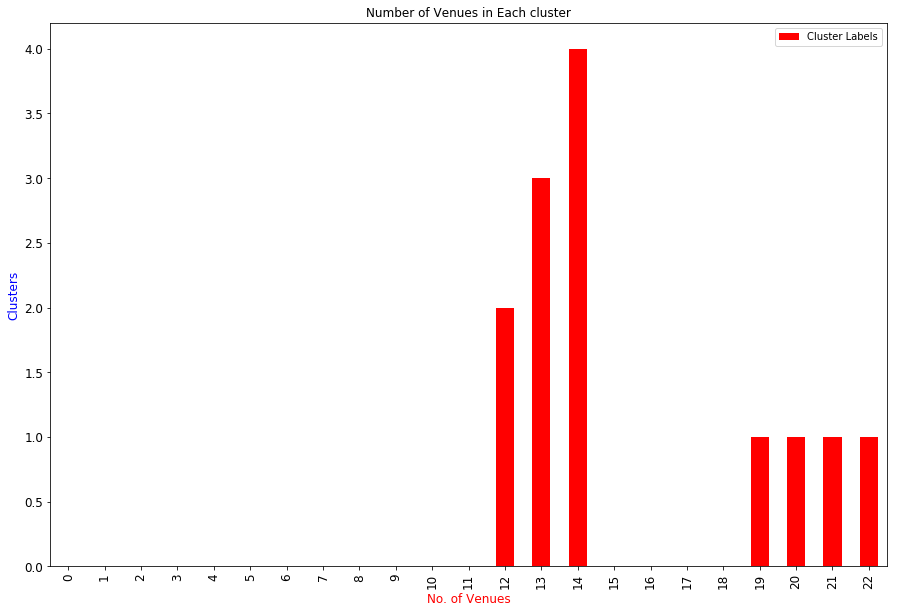

In [58]:
#create a bar chart to show the neighbourhoods
import matplotlib.pyplot as plt
#my_colors = ['red', 'black', 'green', 'blue', 'yellow', 'cyan']
ax = london_merged[['Neighbourhood','Cluster Labels']].plot(kind='bar', title ="Number of Venues in Each cluster", figsize=(15, 10), legend=True, color= 'rainbow', fontsize=12)
ax.set_xlabel("No. of Venues", fontsize=12,color ='red')
ax.set_ylabel("Clusters", fontsize=12,color ='Blue')
plt.show()




In [65]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Neighbourhood'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity= 0.7).add_to(map_clusters)
    
map_clusters
       

*EXAMINE THE CLUSTERS*


  *CLUSTER 1*

In [154]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bexley,0,Italian Restaurant,Pub,Supermarket,Coffee Shop,Clothing Store,Hotel,Pharmacy,Plaza,Portuguese Restaurant,Multiplex
1,Bexley,0,Italian Restaurant,Pub,Supermarket,Coffee Shop,Clothing Store,Hotel,Pharmacy,Plaza,Portuguese Restaurant,Multiplex
2,Bexley,0,Italian Restaurant,Pub,Supermarket,Coffee Shop,Clothing Store,Hotel,Pharmacy,Plaza,Portuguese Restaurant,Multiplex
3,Bromley,0,Pizza Place,Coffee Shop,Clothing Store,Portuguese Restaurant,Electronics Store,Ice Cream Shop,Donut Shop,Department Store,Cosmetics Shop,Chocolate Shop
4,Bromley,0,Pizza Place,Coffee Shop,Clothing Store,Portuguese Restaurant,Electronics Store,Ice Cream Shop,Donut Shop,Department Store,Cosmetics Shop,Chocolate Shop
5,Croydon,0,Pizza Place,Fast Food Restaurant,Supermarket,Bakery,Pub,Italian Restaurant,Coffee Shop,Chinese Restaurant,Chocolate Shop,Electronics Store
6,Croydon,0,Pizza Place,Fast Food Restaurant,Supermarket,Bakery,Pub,Italian Restaurant,Coffee Shop,Chinese Restaurant,Chocolate Shop,Electronics Store
7,Ealing,0,Home Service,Business Service,Clothing Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store
11,Newham,0,Hotel,Light Rail Station,Airport,Sandwich Place,Duty-free Shop,Coffee Shop,Pharmacy,Rafting,Chinese Restaurant,Airport Lounge
12,Redbridge,0,Clothing Store,Coffee Shop,Warehouse Store,Portuguese Restaurant,Gym / Fitness Center,Department Store,Indian Restaurant,Irish Pub,Movie Theater,Bookstore


*CLUSTER 2*

In [155]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Sutton,1,Historic Site,Video Game Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop
16,Sutton,1,Historic Site,Video Game Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop
17,Sutton,1,Historic Site,Video Game Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop
18,Sutton,1,Historic Site,Video Game Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop


*CLUSTER 3*

In [156]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Hillingdon,2,Stables,Warehouse Store,Chocolate Shop,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop


*CLUSTER 4*

In [157]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Hounslow,3,Fast Food Restaurant,Warehouse Store,Video Game Store,Grocery Store,Furniture / Home Store,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop


*CLUSTER 5*

In [158]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Merton,4,Pub,Warehouse Store,Chocolate Shop,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Department Store,Cosmetics Shop


**RESULTS AND DISCUSSION**

We can see from the clusters above, there are no restaurants offering a composition of African food. Most of the restaurants above are Italian Restaurants, fast food chains or bakeries.  Most of the black population in London live in Croydon and Ealing to name a few areas.
In the clusters above for example the most popular restaurants are Pizza Restaurants and in the case of Ealing, there are not many restaurants.
Such areas for example have an estimated number of 110,116 Africans living in those areas.
London is a big and vibrant metropolitan city and a hot spot for businesses. Different classification methods can be used to cluster the neighbourhoods.
I used the k-means algorithm in the study. I set the K-means value to 5 which yielded 18 venues.

I ended the study using visualization to display the data in a map using folium library.

